<a href="https://colab.research.google.com/github/yongan007/Neuroscience/blob/master/Neuro2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal,stats


In [ ]:
def laod_data(Participant1):
  data_participant1 =[]
  for i in range(1,11):
    file_path = "/content/drive/MyDrive/neuro2/"+Participant1+"/Figs_for_spectra/Backgr_int_0."+str(i)+".dat" 
    if i == 10:
      file_path = "/content/drive/MyDrive/neuro2/"+Participant1+"/Figs_for_spectra/Backgr_int_1.dat"
    data_ = np.genfromtxt(file_path)
    data_participant1.append(data_)
  return data_participant1

def convul(data_conten,freq_alpha):
  con=[]
  for i in range(34):
    con_i = np.convolve(data_conten[:,i],freq_alpha)
    con.append(con_i)

  return np.array(con).T


def correlation_coef(con):
  corr_ = []
  corr_mat = np.zeros((31,31))
  for i in range(31):
    for j in range(31):
      if i!=j:
        corr_i,_ = stats.pearsonr(con[:,i],con[:,j])
        corr_.append(corr_i)
        corr_mat[i,j] = corr_i

  return np.average(corr_),corr_mat

def correlation_all(data_participant,freq):
  corel_alpha = np.zeros(10)
  corel_beta = np.zeros(10)
  coef_matrix_a = []
  coef_matrix_b = []

  for i in range(10):
    temp1 = convul(data_participant[i],freq[0])
    corel_alpha[i],coef_matrix_ai = correlation_coef(temp1)
    coef_matrix_a.append(coef_matrix_ai)
    temp2 = convul(data_participant[i],freq[1])
    corel_beta[i],coef_matrix_bi = correlation_coef(temp2)
    coef_matrix_b.append(coef_matrix_bi)
  return corel_alpha,corel_beta,coef_matrix_a,coef_matrix_b





In [ ]:
data_participant1 = laod_data("Participant1")
data_participant2 = laod_data("Participant2")
data_participant3 = laod_data("Participant3")
data_participant4 = laod_data("Participant4")
data_participant5 = laod_data("Participant5")

In [ ]:
freq_beta = signal.firwin(len(data_participant1[0]), [15.0, 30.0], pass_zero=False, fs=250)
freq_alpha = signal.firwin(len(data_participant1[0]), [8.0, 12.0], pass_zero=False, fs=250)
freq = [freq_alpha,freq_beta]


corel_alpha1,corel_beta1,coef_matrix_a1,coef_matrix_b1  = correlation_all(data_participant1,freq)
corel_alpha2,corel_beta2,coef_matrix_a2,coef_matrix_b2  = correlation_all(data_participant2,freq)
corel_alpha3,corel_beta3,coef_matrix_a3,coef_matrix_b3  = correlation_all(data_participant3,freq)
corel_alpha4,corel_beta4,coef_matrix_a4,coef_matrix_b4  = correlation_all(data_participant4,freq)
corel_alpha5,corel_beta5,coef_matrix_a5,coef_matrix_b5  = correlation_all(data_participant5,freq)

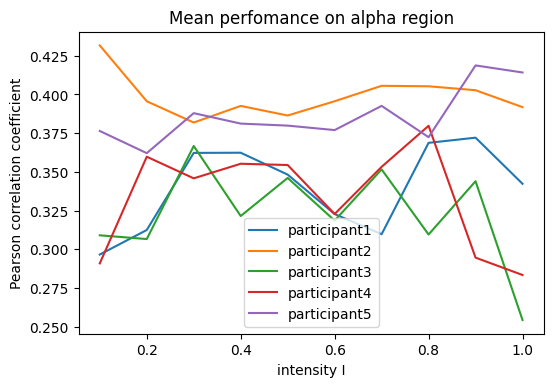

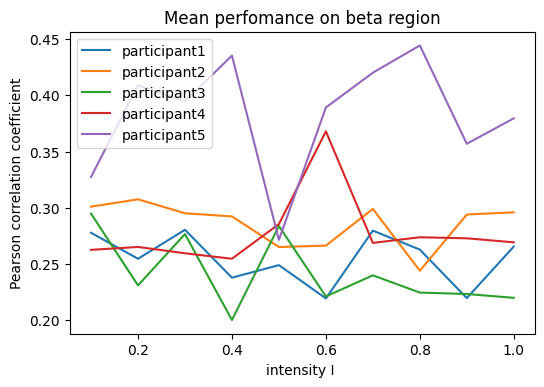

In [ ]:
intensity = [i*0.1 for i in range(1,11)]

fig=plt.figure(dpi =100)

plt.plot(intensity,corel_alpha1,label="participant1")
plt.plot(intensity,corel_alpha2,label="participant2")
plt.plot(intensity,corel_alpha3,label="participant3")
plt.plot(intensity,corel_alpha4,label="participant4")
plt.plot(intensity,corel_alpha5,label="participant5")

plt.legend(loc="best")
plt.xlabel("intensity I")
plt.ylabel("Pearson correlation coefficient")
plt.title("Mean perfomance on alpha region")

plt.show()

fig=plt.figure(dpi =100)

plt.plot(intensity,corel_beta1,label="participant1")
plt.plot(intensity,corel_beta2,label="participant2")
plt.plot(intensity,corel_beta3,label="participant3")
plt.plot(intensity,corel_beta4,label="participant4")
plt.plot(intensity,corel_beta5,label="participant5")

plt.legend(loc="best")
plt.xlabel("intensity I ")
plt.ylabel("Pearson correlation coefficient")
plt.title("Mean perfomance on beta region")

plt.show()

Plot correlation Matrix of Alpha

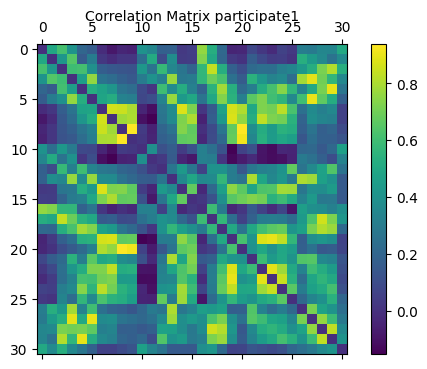

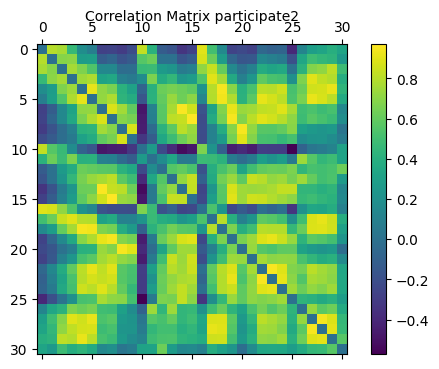

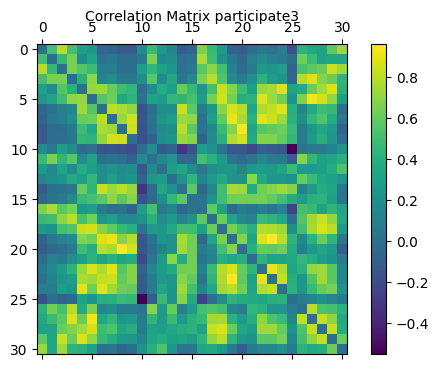

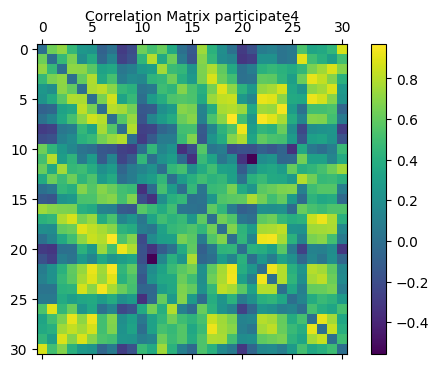

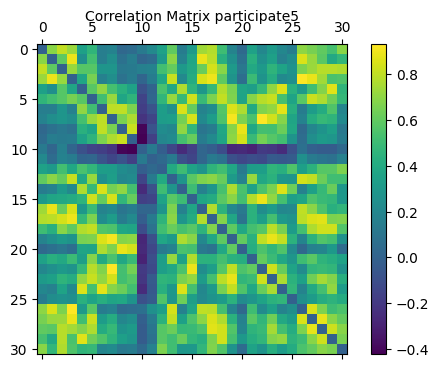

In [ ]:
def plot_mat_correlation(coef_matrix,i):
  f = plt.figure(dpi =100)
  plt.matshow(coef_matrix, fignum=f.number)
  cb = plt.colorbar()
  cb.ax.tick_params(labelsize=10)
  plt.title('Correlation Matrix participate'+str(i), fontsize=10);
  plt.show()

plot_mat_correlation(coef_matrix_a1[np.argmax(corel_alpha1)],1)
plot_mat_correlation(coef_matrix_a2[np.argmax(corel_alpha2)],2)
plot_mat_correlation(coef_matrix_a3[np.argmax(corel_alpha3)],3)
plot_mat_correlation(coef_matrix_a4[np.argmax(corel_alpha4)],4)
plot_mat_correlation(coef_matrix_a5[np.argmax(corel_alpha5)],5)


Plot correlation Matrix of Beta

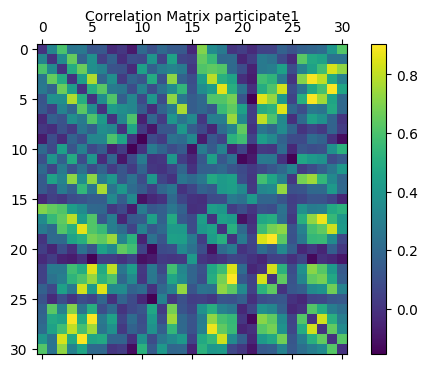

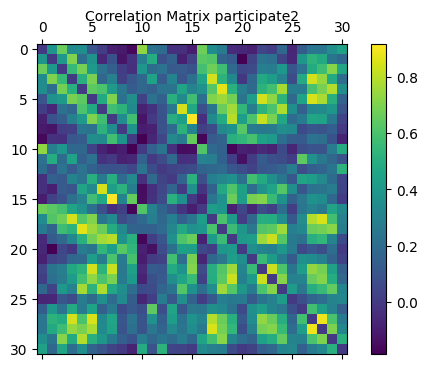

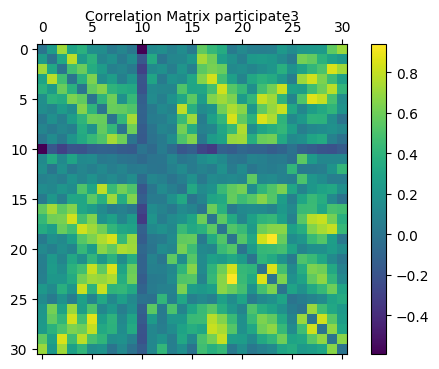

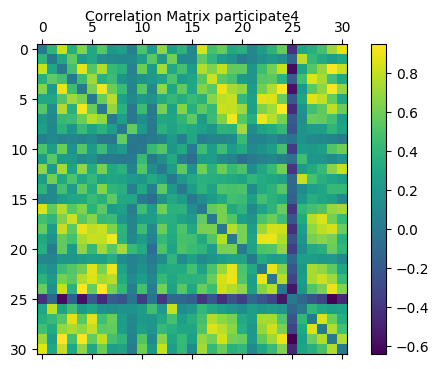

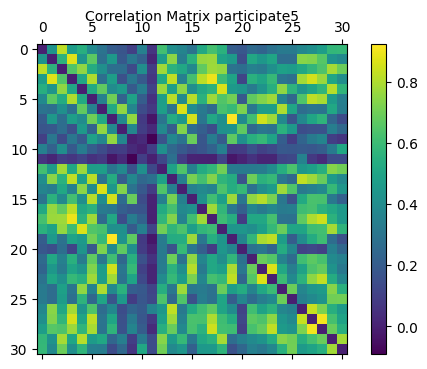

In [ ]:
plot_mat_correlation(coef_matrix_b1[np.argmax(corel_beta1)],1)
plot_mat_correlation(coef_matrix_b2[np.argmax(corel_beta2)],2)
plot_mat_correlation(coef_matrix_b3[np.argmax(corel_beta3)],3)
plot_mat_correlation(coef_matrix_b4[np.argmax(corel_beta4)],4)
plot_mat_correlation(coef_matrix_b5[np.argmax(corel_beta5)],5)

# Task 3 : ANN

In [ ]:
def laod_data(Participant1):
  data_participant1 =np.zeros((10,15000,31))
  for i in range(1,11):
    file_path = "/content/drive/MyDrive/neuro2/"+Participant1+"/Figs_for_spectra/Backgr_int_0."+str(i)+".dat" 
    if i == 10:
      file_path = "/content/drive/MyDrive/neuro2/"+Participant1+"/Figs_for_spectra/Backgr_int_1.dat"
    data_ = np.genfromtxt(file_path)[:15000,:31]
    # data_participant1.append(data_)
    data_participant1[i-1,:,:] = data_
  return data_participant1

def concat_data(data_participant1):
  a_0 = np.hstack((data_participant1[0],0.1*np.ones((data_participant1[0].shape[0],1))))
  for i in(range(9)):
    a_i = np.hstack((data_participant1[i+1],0.1*(i+2)*np.ones((data_participant1[i+1].shape[0],1))))
    data = np.vstack((a_0,a_i))
    a_0 = data
  return data

def training(data1):
  rsquare = np.zeros(31)
  for i in (range(31)):
    X = data1[:,i].reshape(-1,1)
    y = data1[:,-1]
    scaler = MinMaxScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    x_train= scaler.fit_transform(X_train)
    x_test= scaler.fit_transform(X_test)
    regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)
    y_pred=regr.predict(x_test)
    # np.shape(y_pred)
    rsquare[i]=r2_score(y_test, y_pred, multioutput="raw_values")
  return rsquare


def slicing_window(data1):
  dt = []
  t0 = 0
  for t in range(5,60,5):
    dt_i = data1[:,t0:250*t,:]
    dt_i = concat_data(dt_i)
    dt.append(dt_i)
    t0=250*t
  return dt

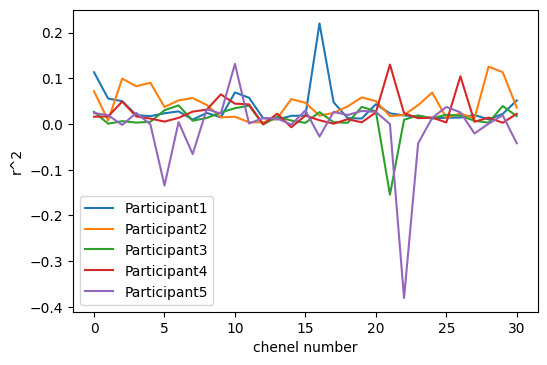

In [ ]:
rsquare = np.zeros((5,31))
for i in range(5):
  data_name = "Participant"+str(i+1)
  data1 = concat_data(laod_data(data_name))
  rsquare[i,:] = training(data1)

fig=plt.figure(dpi =100)
for i in range(5):
  data_name = "Participant"+str(i+1)
  plt.plot(rsquare[i,:],label=data_name)
plt.xlabel("chenel number")
plt.ylabel("r^2")
plt.legend()

>Add time-window 5s, 10s, etc

In [ ]:
def time_dep_r_square(data):
  dt1 = slicing_window(data)
  rsquare = np.zeros((len(dt1),31))
  rs_max = []
  for i,data_t in enumerate(dt1):
    rs = training(data_t)
    rsquare[i,:] = rs
    rs_max.append(max(rs))
  return rs_max


  data = []
for i in range(5):
  data_name = "Participant"+str(i+1)
  temp = laod_data(data_name)
  data.append(temp)
rsquare = []
for i in range(5):
  rs= time_dep_r_square(data[i])
  rsquare.append(rs)

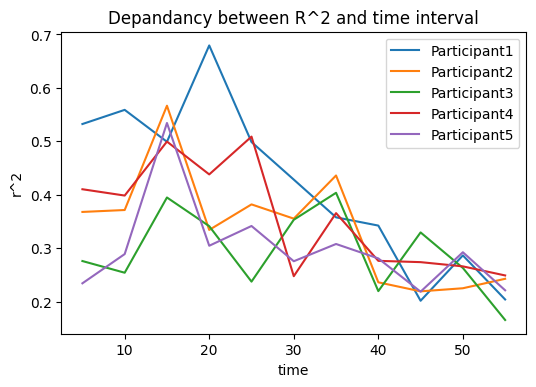

In [ ]:
t =  [i for i in range(5,60,5)]
fig=plt.figure(dpi =100)


for i in range(5):
  data_name = "Participant"+str(i+1)
  plt.plot(t,rsquare[i],label=data_name)
plt.xlabel("time")
plt.ylabel("r^2")
plt.title("Depandancy between R^2 and time interval")
plt.legend()

# Task4 : Statistical Test

In [ ]:
from scipy.stats import ttest_ind,chisquare,chi2_contingency,chi2


In [ ]:
def chisquare_test(coef_matrix_a1,corel_alpha1,num_participant,):
  max_density1 = np.argmax(corel_alpha1)
  stat,p = chisquare(coef_matrix_a1[max_density1].flatten(), axis=None)
  # critical = chi2.ppf(p, dof)
  print(num_participant, "\nmax intensity =",(max_density1+1)*0.1)

  print('stat=%.3f, p=%.3f' % (stat, p))
  # if p > 0.05:
  #   print('Probably independent')
  # else:
  #   print('Probably dependent')
  print("\n")
  # return stat,prob

In [ ]:
corel_beta = [corel_beta1,corel_beta2,corel_beta3,corel_beta4,corel_beta5]
coef_matrix_b = [coef_matrix_b1,coef_matrix_b2,coef_matrix_b3,coef_matrix_b4,coef_matrix_b5]
corel_alpha = [corel_alpha1,corel_alpha2,corel_alpha3,corel_alpha4,corel_alpha5]
coef_matrix_a = [coef_matrix_a1,coef_matrix_a2,coef_matrix_a3,coef_matrix_a4,coef_matrix_a5]

>**Chi test of $\alpha$ region**

In [ ]:
for i in range(0,5):
  name_particitpant = "participant "+str(i+1)
  chisquare_test(coef_matrix_a[i],corel_alpha[i],name_particitpant)

participant 1 
max intensity = 0.9
stat=180.964, p=1.000


participant 2 
max intensity = 0.1
stat=289.277, p=1.000


participant 3 
max intensity = 0.30000000000000004
stat=222.654, p=1.000


participant 4 
max intensity = 0.8
stat=250.622, p=1.000


participant 5 
max intensity = 0.9
stat=189.570, p=1.000




>**Chi test of $\beta$ region**


In [ ]:
for i in range(0,5):
  name_particitpant = "participant "+str(i+1)
  chisquare_test(coef_matrix_b[i],corel_beta[i],name_particitpant)

participant 1 
max intensity = 0.30000000000000004
stat=210.123, p=1.000


participant 2 
max intensity = 0.2
stat=197.746, p=1.000


participant 3 
max intensity = 0.1
stat=218.707, p=1.000


participant 4 
max intensity = 0.6000000000000001
stat=233.323, p=1.000


participant 5 
max intensity = 0.8
stat=118.464, p=1.000




In [ ]:
def t_test(coef_matrix_a1,corel_alpha1,coef_matrix_b1,corel_beta1,num_participant):
  a = coef_matrix_a1[max_density1].flatten()
  b = coef_matrix_b1[np.argmax(corel_beta1)].flatten()
  stat, p = ttest_ind(a, b)
  print(num_participant)

  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably the same distribution')
  else:
    print('Probably different distributions')
  print("\n")

In [ ]:
for i in range(0,5):
  name_particitpant = "participant "+str(i+1)
  t_test(coef_matrix_a[i],corel_alpha[i],coef_matrix_b[i],corel_beta[i],name_particitpant)


participant 1
stat=7.710, p=0.000
Probably different distributions


participant 2
stat=6.423, p=0.000
Probably different distributions


participant 3
stat=3.757, p=0.000
Probably different distributions


participant 4
stat=-5.023, p=0.000
Probably different distributions


participant 5
stat=-2.112, p=0.035
Probably different distributions


